In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex

In [3]:
n = 4

In [4]:
def apply_oracle(qc):
    # Oracle
    qc.h([2,3])
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(2)
    qc.x([1,3])
    qc.ccx(0,2,3)
    qc.x(2)
    qc.h(3)
    qc.x([1,3])
    qc.h(2)
    qc.mct([0,1,3],2)
    qc.x([1,3])
    qc.h(2)
    qc.x(2)

    return qc

In [5]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [6]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [9]:
grover_circuit = QuantumCircuit(n)
all_qubits = list(range(n))
grover_circuit = initialize_s(grover_circuit,all_qubits)
for i in range(3):
    grover_circuit = apply_oracle(grover_circuit)
    grover_circuit.append(diffuser(n), all_qubits)
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐                                                  ┌────────┐     »
   q_0: ┤ H ├───────■──────────────■──────────────■────────────┤0       ├─────»
        ├───┤       │  ┌───┐┌───┐  │              │  ┌───┐     │        │     »
   q_1: ┤ H ├───────■──┤ X ├┤ X ├──┼──────────────■──┤ X ├─────┤1       ├─────»
        ├───┤┌───┐┌─┴─┐├───┤├───┤  │  ┌───┐┌───┐┌─┴─┐├───┤┌───┐│  U$_s$ │┌───┐»
   q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤2       ├┤ H ├»
        ├───┤├───┤├───┤└───┘└───┘┌─┴─┐├───┤├───┤└─┬─┘├───┤└───┘│        │├───┤»
   q_3: ┤ H ├┤ H ├┤ X ├──────────┤ X ├┤ H ├┤ X ├──■──┤ X ├─────┤3       ├┤ H ├»
        └───┘└───┘└───┘          └───┘└───┘└───┘     └───┘     └────────┘└───┘»
meas: 4/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                                                     ┌────────┐               »
«   q_0: ──■──────────────■──────────────■────────────┤0       ├───────■───────»
«          │  ┌───┐┌───┐  │              │  ┌───┐     │        │       │  ┌───┐»
«   q_1: ──■──┤ X ├┤ X ├──┼──────────────■──┤ X ├─────┤1       ├───────■──┤ X ├»
«        ┌─┴─┐├───┤├───┤  │  ┌───┐┌───┐┌─┴─┐├───┤┌───┐│  U$_s$ │┌───┐┌─┴─┐├───┤»
«   q_2: ┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤2       ├┤ H ├┤ X ├┤ H ├»
«        ├───┤└───┘└───┘┌─┴─┐├───┤├───┤└─┬─┘├───┤└───┘│        │├───┤├───┤└───┘»
«   q_3: ┤ X ├──────────┤ X ├┤ H ├┤ X ├──■──┤ X ├─────┤3       ├┤ H ├┤ X ├─────»
«        └───┘          └───┘└───┘└───┘     └───┘     └────────┘└───┘└───┘     »
«meas: 4/══════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                           ┌────────┐ ░ ┌─┐         
«   q_0: ───────■──────────────■────────────┤0       ├─░─┤M├─────────
«        ┌───┐  │              │  ┌───┐     │        │ ░ └╥┘┌─┐      
«   q_1: ┤ X ├──┼──────────────■──┤ X ├─────┤1       ├─░──╫─┤M├──────
«        ├───┤  │  ┌───┐┌───┐┌─┴─┐├───┤┌───┐│  U$_s$ │ ░  ║ └╥┘┌─┐   
«   q_2: ┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤2       ├─░──╫──╫─┤M├───
«        └───┘┌─┴─┐├───┤├───┤└─┬─┘├───┤└───┘│        │ ░  ║  ║ └╥┘┌─┐
«   q_3: ─────┤ X ├┤ H ├┤ X ├──■──┤ X ├─────┤3       ├─░──╫──╫──╫─┤M├
«             └───┘└───┘└───┘     └───┘     └────────┘ ░  ║  ║  ║ └╥┘
«meas: 4/═════════════════════════════════════════════════╩══╩══╩══╩═
«                                                         0  1  2  3

{'0010': 6, '1010': 3, '1110': 4, '0101': 9, '1001': 5, '1000': 2, '0100': 13, '1100': 5, '0001': 9, '0011': 15, '0111': 7, '1111': 10, '0000': 5, '0110': 6, '1011': 925}


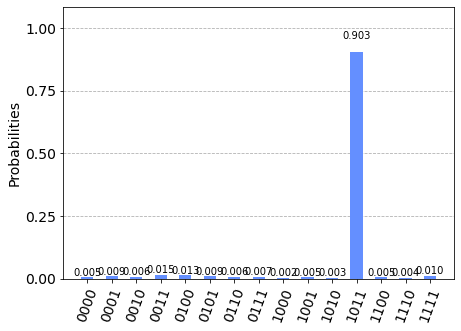

In [10]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)